# Classification problems

## Intro and definition

Examples of classification problems are things like: (a) identifying email as *Spam* or *Not Spam*, (b) determining if a tumor is maglignant or benign. In particular, these examples of **binary classification** where there are two possible outcomes. Outcomes can be described in pairs of 
1. positive / negatives 
2. yes / no
3. true / false
4. 1 / 0

Plots of classification data sets often use symbols to indicate the outcome of an example. In the plots below `x` is used o represent the positive values (value $1$) while `o` represents negative outcomes (value $0$)

### Binary classification problem with 1 feature

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# This statement is to use latex for math formula format in python plots.
# If it produces error in your computer, just comment it out.
# The shortcut for commenting/uncommenting is Ctrl + "/" (Ctrl + forward slash)
plt.rcParams['text.usetex'] = True

In [154]:
x_train = np.array([0, 1, 2, 3, 4, 5], dtype=np.float64)
X_train = x_train.reshape((-1, 1))
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.float64)

# pos has the same shape as y_train and contains only True or False.
# pos[j] takes value True if y_train[j] is equal to 1, the rest is False. 
# Similarly, neg[j] takes value True if y_train[j] is equal to 0.
pos = (y_train == 1)
neg = (y_train == 0)

print(f"pos = {pos}")
print(f"neg = {neg}")

pos = [False False False  True  True  True]
neg = [ True  True  True False False False]


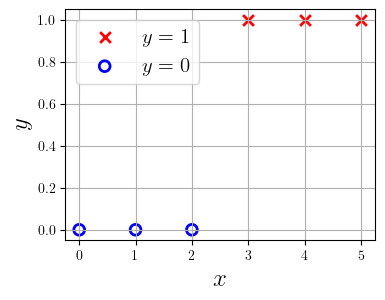

In [155]:
plt.figure(figsize=(4, 3))
plt.scatter(x_train[pos], y_train[pos], marker='x', color='r', label="$y = 1$", s=60, lw=2)
plt.scatter(x_train[neg], y_train[neg], marker='o', facecolor='none', label='$y = 0$', s=60, edgecolors='b', lw=2)
plt.legend(fontsize=15)
plt.grid(True)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$y$', fontsize=18)
plt.show()

### Binary classification problem with 2 features

Let us create a set of data that can be seprated by a decision boundary of ellipse shape. The data of positive class $y = 1$ will sit outside the ellipse and the data of negative class $y = 0$ will sit inside the ellipse. Then, we add some more data of positive class to the region in the ellipse and data of negative class to the region outside the ellipse so that the ellipse decision boundary is not a perfect classification boundary.

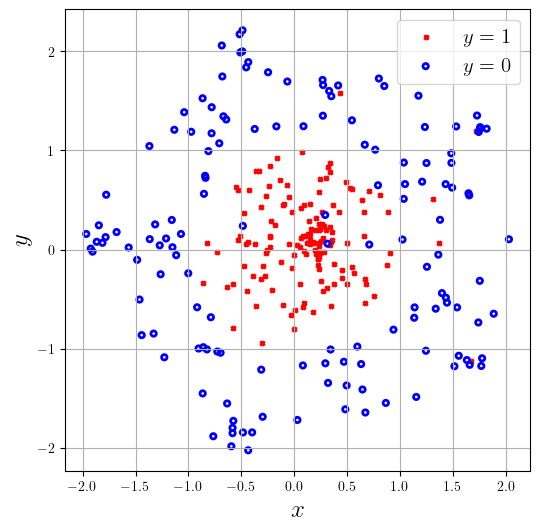

In [156]:
np.random.seed(42)
r = np.concatenate((np.linspace(0.1, 0.8, 4), np.linspace(1.2, 2.0, 4)))
r = np.tile(r, reps=(2,1)).T
n_theta = 36
theta = np.zeros(shape=(r.shape[0], n_theta))
for i in range(theta.shape[0]):
    theta[i] = np.linspace(0.2*i*np.pi, 2.2*i*np.pi, n_theta)
x = np.zeros(shape=(r.shape[0]*theta.shape[1], 2))
idx = 0
for i in range(r.shape[0]):
    for k in range(theta.shape[1]):
        x[idx, 0] = r[i,0] * np.cos(theta[i,k])
        x[idx, 1] = r[i,1] * np.sin(theta[i,k])
        idx += 1
perturbation = np.random.normal(loc=0.1, scale=0.1, size=(x.shape))
x += perturbation

ra, rb = 1, 1
mask = x[:,0]**2 / ra**2 + x[:,1]**2 / rb**2 <= 1
y = np.zeros(x.shape[0])
y[mask == True] = 1
y[mask == False] = 0
r1, r0 = np.sum(y==1), np.sum(y==0)
y[np.random.randint(0, r1, size=5)] = 0
y[np.random.randint(r1, y.shape[0], size=5)] = 1
# We just take 10 points in True class and switch the label to False class
pos = (y == 1)
neg = (y == 0)

plt.figure(figsize=(6, 6))
plt.scatter(x[pos,0], x[pos,1], marker='x', color='r', label="$y = 1$", s=10, lw=2)
plt.scatter(x[neg,0], x[neg,1], marker='o', facecolor='none', label='$y = 0$', s=15, edgecolors='b', lw=2)
plt.legend(fontsize=15)
plt.grid(True)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$y$', fontsize=18)
plt.show()

Note in the plots above:
- In the single variable plot, positive results are shown both a red 'X's and as y=1. Negative results are blue 'O's and are located at y=0.
   - Recall in the case of linear regression, y would not have been limited to two values but could have been any value.
- In the two-variable plot, the y axis is not available.  Positive results are shown as red 'X's, while negative results use the blue 'O' symbol.
    - Recall in the case of linear regression with multiple variables, y would not have been limited to two values and a similar plot would have been three-dimensional.

## Linear Regression approach

In the previous week, you applied linear regression to build a prediction model. Let's try that approach here using the simple example that was described in the lecture. The model will predict if a tumor is benign or malignant based on tumor size.

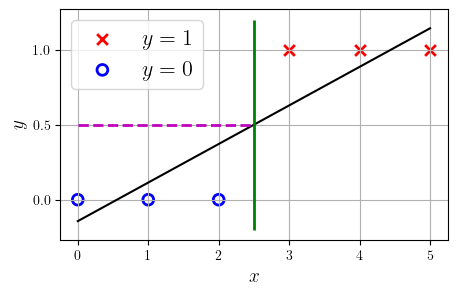

In [157]:
from sklearn.linear_model import LinearRegression

# We put the whole plotting procedure into a function because
# we need to use it again on the new dataset.
def classification_with_linear_regression(x_train, y_train):
    lr_model = LinearRegression()
    X_train = x_train.reshape((-1, 1))
    lr_model.fit(X_train, y_train)
    plt.figure(figsize=(5, 3))
    xx = np.array([x_train.min(), x_train.max()])
    XX = xx.reshape((-1, 1))

    pos = (y_train == 1)
    neg = (y_train == 0)
    plt.scatter(x_train[pos], y_train[pos], marker='x', color='r', label="$y = 1$", s=60, lw=2)
    plt.scatter(x_train[neg], y_train[neg], marker='o', facecolor='none', label='$y = 0$', s=60, \
                edgecolors='b', lw=2)
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.plot(xx, lr_model.predict(XX), 'k-')
    plt.yticks(np.linspace(0, 1, 3))
    w = lr_model.coef_[0]
    b = lr_model.intercept_
    threshold = 0.5
    x0 = (threshold - b) / w
    plt.hlines(threshold, 0, x0, color='m', linestyle='--', linewidth=2)
    plt.vlines(x0, -0.2, 1.2, color='g', linestyles='-', linewidth=2)
    
    
classification_with_linear_regression(x_train, y_train)

Anything on the left of the green line corresponds to $y = 0$ and on the right to $y= 1$. So the prediction is good. But let us try to solve this problem again but this time with a new dataset. We add one more data point $\mathbf{p} = (21, 1)$ to the data set. Then, let us try to make prediction using linear regression and the threshold $\tau = 0.5$.

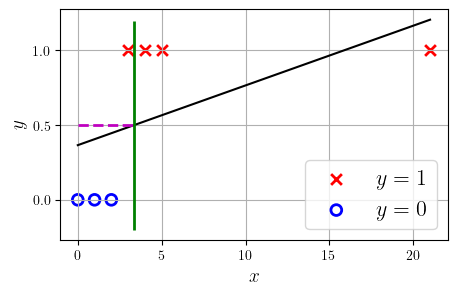

In [158]:
# The dataset is extended by just one more data point.
x_new = np.hstack( (x_train, np.array([21])) )
y_new = np.hstack( (y_train, np.array([1])) )
# Here, we use the function defined in the above cell.
classification_with_linear_regression(x_new, y_new)

We can see that with only data point far away from the others can spoil our prediction!

# Logistic regression

Now, let us try a different approach, the so called **logistic regression**. As discussed in the lecture, for a binary classification problem, we can start by using our linear regression model
\begin{equation*}
f_{\vec{w},b}(\vec{x}^{(i)}) = \vec{w} \cdot  \vec{x}^{(i)} + b
\end{equation*}
to predict $y$ given $x$. 
- However, we would like the predictions of our classification model to be between $0$ and $1$ since our output variable $y$ is either $0$ or $1$.
- This can be accomplished by using a **sigmoid function** which maps all input variables to values between $0$ and $1$.

Let's implement the logistic regression and see this for ourselves.

## Formula for sigmoid function

The formula for a sigmoid function is as follows
$$
g(z) = \frac{1}{1 + \mathrm{e}^{-z}}
$$

In the case of logistic regression, the variable $z$ is the output of the linear regression model, and then also this variable will be fed into the sigmoid function $g(z)$ so that we finally have ($z$ depends on $\vec{w}$ and $b$)

$$f_{\vec{w}, b}(\vec{x}) = g(\underbrace{\vec{w} \cdot \vec{x} + b}_{z}),\qquad z = \vec{w}\cdot \vec{x} + b$$

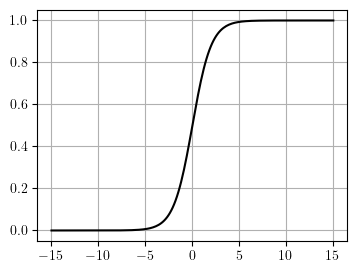

In [159]:
# Let us plot the sigmoid function first!
z = np.linspace(-15, 15, 201)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
plt.figure(figsize=(4, 3))
plt.plot(z, sigmoid(z), 'k-', linewidth=1.5)
plt.grid(True)

# Clearly, the output g(z) as function of z is 
# always in the interval (0, 1)

## Cost function

Unfortunately, the mean squared error cost function (with the factor $\frac{1}{2}$ too)
$$
J(\vec{w}, b) = \frac{1}{2 m} \sum\limits_{i=1}^{m} \big[f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \big]^2
$$


leads to a non-convex cost function. This leads to a lot of complication for an optimization problem, and thus in our case the minimization problem. As in the lecture, a way to obtain a **convex** cost function is to use the following cost function expression.

\begin{equation*}\tag{2}
J(\vec{w}, b) = -\frac{1}{m} \sum\limits_{i=1}^{m}\bigg\{ y^{(i)} \log\big[f_{\vec{w},b}(\vec{x}^{(i)})\big] + (1 - y^{(i)})\log\big[(1 - f_{\vec{w},b} (\vec{x}^{(i)})\big] \bigg\}
\end{equation*}

Let us try to study two forms of cost function on the same dataset.

#### Plot cost function using Mean Squared Error Function

In [160]:
# We define a Python function to compute cost function according
# mean squared error formula (again with factor 1/2) 
# namely equation (1) above
def compute_cost_squared_error(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = 1 / (1 + np.exp(-z))
    cost = 1/(2 * m) * np.sum( (f_wb - y)**2 )
    return cost

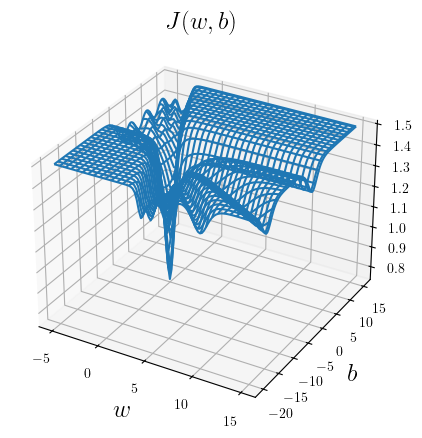

In [161]:
# plt.rcParams['axes.labelpad'] = 0
def plot_cost_function(X, y, w, b, cost_func):
    W, B = np.meshgrid(w, b)
    cost = np.zeros_like(W)
    for i in range(len(w)):
        for j in range(len(b)):
            cost[i,j] = cost_func(X, y, W[i,j], B[i,j])
    
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(W, B, cost)

    ax.set_xlabel('$w$', fontsize=18, linespacing=3.2)
    ax.set_ylabel('$b$', fontsize=18, linespacing=3.2)
#     ax.set_zlabel('$J(w, b)$', fontsize=18, linespacing=3.2)
    ax.set_title('$J(w, b)$', fontsize=18)
    
    return fig, ax

w = np.linspace( -5, 15, 101)
b = np.linspace(-20, 15, 101)
fig, ax = plot_cost_function(X_train, y_train, w, b, compute_cost_squared_error)
ax.set_xticks(np.linspace(-5, 15, 5))
ax.set_yticks(np.linspace(-20, 15, 8))
plt.show()

#### Plot cost function using maximum likelihood formulation

In [162]:
# Now, we will define the cost function according 
# to equation (2) above
def compute_cost_max_likelihood(X, y, w, b):
    m = X.shape[0]
    # First we compute z
    z = np.dot(X, w) + b
    # Compute model function
    f_wb = 1 / (1 + np.exp(-z)) # that's it! as simple as it is.
    # Compute the cost function
    lost_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)
    cost = -(1/m) *( np.sum(lost_on_examples) )
    return cost

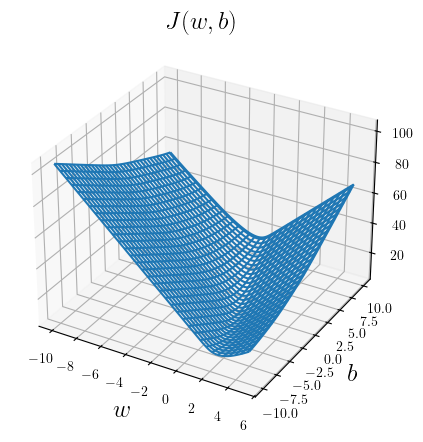

In [163]:
w = np.linspace(-10, 5, 101)
b = np.linspace(-10, 10, 101)
fig, ax = plot_cost_function(X_train, y_train, w, b, compute_cost_max_likelihood)
# This is the shape of a convex function

### Revisit the maximum likelihood cost function

The cost function is convex as seen from the figure. However, this figure is not misleading because the function is not numericallly correct due to the machine outflow. Indeed, if you run the code above (repeated in the below cell), you will see the following warning:

```Python
RuntimeWarning: divide by zero encountered in log
  lost_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)

RuntimeWarning: invalid value encountered in multiply
  lost_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)
```

This is partly due to the fact that our dataset is very small and is very well linearly separated. Note that $f_{\vec{w},b}(\vec{x})$ indicates the probability $y = 1$ given the example $\vec{x}$. So, when $w$ is large enough, the value $z = w x + b$ is also very large so that $\exp(z)$ is very large and the sigmoid function $\sigma(z)$ is very close to $1$. In such scenario, we have that $-\log(f_{\vec{w},b}(\vec{x}))$ is very close to $0$, and $-\log(1 - f_{\vec{w},b})$ is extremely large. However, computation of $\log(1 - f_{\vec{w},b})$ requires the computation $\log(a)$ with $a$ being an extremly small number.

In the following, the code has been changed slightly so that we can see when $f_{\vec{w},b}$ is very close to $1$ and then the computation of $\log(1 - f)$ gives in correct numerical value. Indeed, that is numerically equivalent to computing $\log(0)$ which is impossible in theory. In a training process, the gradient descent is used and the gradient of the cost function $\nabla $J$ is used instead of the cost function $J(\vec{w}, b)$ itself. For this reason, we don't have trouble of computing $\log(0)$. However, there will be a slight trouble that is related to the numerical nature of the problem that will be discussed later.

w = 10.00, b = -10.00, f = [[4.53978687e-05]
 [5.00000000e-01]
 [9.99954602e-01]
 [9.99999998e-01]
 [1.00000000e+00]
 [1.00000000e+00]]
w = 10.00, b = -9.25, f = [[9.61024155e-05]
 [6.79178699e-01]
 [9.99978555e-01]
 [9.99999999e-01]
 [1.00000000e+00]
 [1.00000000e+00]]
w = 10.00, b = -8.50, f = [[2.03426978e-04]
 [8.17574476e-01]
 [9.99989870e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]]
w = 9.00, b = -7.75, f = [[4.30557081e-04]
 [7.77299861e-01]
 [9.99964644e-01]
 [9.99999996e-01]
 [1.00000000e+00]
 [1.00000000e+00]]
w = 10.00, b = -7.75, f = [[4.30557081e-04]
 [9.04650535e-01]
 [9.99995215e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]]
w = 9.00, b = -7.00, f = [[9.11051194e-04]
 [8.80797078e-01]
 [9.99983299e-01]
 [9.99999998e-01]
 [1.00000000e+00]
 [1.00000000e+00]]
w = 10.00, b = -7.00, f = [[9.11051194e-04]
 [9.52574127e-01]
 [9.99997740e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]]
w = 9.00, b = -6.25, f = [[0.00192673]
 [0.93991335]
 [0

C:\Users\ln69g\AppData\Local\Temp\ipykernel_20804\2774190759.py:13: RuntimeWarning: divide by zero encountered in log
  lost_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)
C:\Users\ln69g\AppData\Local\Temp\ipykernel_20804\2774190759.py:13: RuntimeWarning: invalid value encountered in multiply
  lost_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)


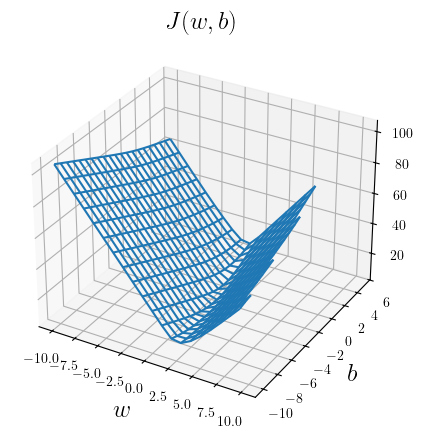

In [184]:
# Now, we will define the cost function according 
# to equation (2) above
def compute_cost_max_likelihood(X, y, w, b):
    m = X.shape[0]
    # First we compute z
    z = np.dot(X, w) + b
    # Compute model function
    f_wb = 1 / (1 + np.exp(-z)) # that's it! as simple as it is.
    mask = np.abs(1 - f_wb) < 1e-64
    if np.any(mask) == True:
        print(f"w = {w:.2f}, b = {b:.2f}, f = {f_wb}")
    # Let us print out f_wb if (1 - f_wb) is very close to 0
    lost_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)
    cost = -(1/m) *( np.sum(lost_on_examples) )

    return cost

w = np.linspace(-10, 10, 21)
b = np.linspace(-10, 5, 21)
fig, ax = plot_cost_function(X_train, y_train, w, b, compute_cost_max_likelihood)

To study this effect in more depth, let us look at the result of $f_{\vec{w},b}$ for the specific value $w=10, b = -2.5$. Then, we compute $r = -\log(1 - f_{\vec{w},b})$ for all the training examples. As you'll see, some training examples make $r = -\log(1 - f)$ become $+\infty$.

In [193]:
w0, b0 = 10, -2.5
z = np.dot(X_train, w0) + b0
f_wb = 1 / (1 + np.exp(-z))
print(f_wb)
# Now, let us try to compute -log(1 - f)
r = -np.log(1 - f_wb)
print(r)

[[0.07585818]
 [0.99944722]
 [0.99999997]
 [1.        ]
 [1.        ]
 [1.        ]]
[[ 0.07888973]
 [ 7.50055293]
 [17.50000002]
 [27.50001303]
 [        inf]
 [        inf]]


C:\Users\ln69g\AppData\Local\Temp\ipykernel_20804\572140857.py:6: RuntimeWarning: divide by zero encountered in log
  r = -np.log(1 - f_wb)


### Compute cost function symbolically

To avoid the numerical trouble mentioned above, we can compute the cost function in a mathemtical rigous way. Luckily, this can be done by symbolic computation in Python. To perform symbolic calculation, we need the library `sympy`. To install it, use the command

```Python
!pip install sympy
```

In the following, we shall compute the cost function symbolically and plot it again.

In [196]:
# Uncomment the following statement if you don't have sympy
# !pip install sympy

import sympy as sp

In [ ]:
w, b = sp.symbols("w, b")



## Gradient descent for logistic regression

It is the time to implement the logistic regression for our initial binary classification problem. Although the cost function used for **logistic regression** is different from the one used for linear regression, the gradient of the cost function $\nabla J$ turns out to have the same form. The gardient descent takes the form
$$
\begin{aligned}
w_1 &= w_1 - \alpha \frac{1}{m}\sum\limits_{i=1}^{m}\big( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \big) x_{1}^{(i)} \\
w_2 &= w_2 - \alpha \frac{1}{m}\sum\limits_{i=1}^{m}\big( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \big) x_{2}^{(i)} \\
\vdots \\
w_n &= w_n - \alpha \frac{1}{m}\sum\limits_{i=1}^{m}\big( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \big) x_{n}^{(i)}
\end{aligned}
$$

As for the classification problem of one input feature, the gradient descent takes only one equation
$$
w = w - \alpha \frac{1}{m}\sum\limits_{i=1}^{m}\big( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \big) x^{(i)}
$$

Saying that, it is not completely right to say the gradient descent formulations for the logistic regression and for the linear regression are identical. The reason is that the model function $\displaystyle f_{\vec{w}, b} = g(\vec{w}\cdot \vec{x} + b)= \frac{1}{1 + \exp(-(\vec{w}\cdot\vec{x}+b))}$ is not the same as the model function $f_{\vec{w},b} = \vec{w}\cdot \vec{x}+b$ for the linear regression.

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost_grad(X_train, y_train, w, b):
    m = X_train.shape[0]
    z = np.dot(X_train, w) + b
    f_wb = sigmoid(z)
    err = f_wb - y_train
    dJ_dw = 1/m * np.dot(err, X_train)
    dJ_db = 1/m * np.sum(err)
    
    return dJ_dw, dJ_db

# Let us test the defined function
compute_cost_grad(X_train, y_train, w=np.array([0.5]), b=0.1)

(array([0.14335871]), np.float64(0.2624464571491363))

In [12]:
# Let us test the gradient versus the finite difference approximation
delta = 1e-6
w0, b0 = np.array([0.5]), 0.1
w_pos, w_neg = w0 + delta, w0 - delta
J_pos = compute_cost_max_likelihood(X_train, y_train, w_pos, b0)
J_neg = compute_cost_max_likelihood(X_train, y_train, w_neg, b0)
dJ_dw_FD = (J_pos - J_neg) / (2 * delta)  # FD stands for finite difference
dJ_dw, dJ_db = compute_cost_grad(X_train, y_train, w0, b0)
print(f"Using analytical formula: {dJ_dw}")
print(f"Using finite difference : {dJ_dw_FD}")

# The comparison is fantastic (if you run the code correctly!)

Using analytical formula: [0.14335871]
Using finite difference : 0.1433587143440107


In [81]:
def gradient_descent(X_train, y_train, w_init, b_init, alpha, func_value, func_grad, TOL=1e-6, max_iter=1000):

    w = w_init
    b = b_init
    history = {'w': [], 'b': [], 'J': []}
    history['w'].append(w)
    history['b'].append(b)
    history['J'].append(func_value(X_train, y_train, w, b))
    for step in range(max_iter):
        dJ_dw, dJ_db = func_grad(X_train, y_train, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db
        J = func_value(X_train, y_train, w, b)
        if J < TOL:
            print(f"Gradient descent converges at step {step}")
            break
        history['w'].append(w)
        history['b'].append(b)
        history['J'].append(J)
        
        # if convergence, break the iteration
        # if step > 1 and np.abs(history['J'][-1] - history['J'][-2]) / np.abs(history['J'][-1]) < TOL:
        if step > 1:
            rel = np.array([np.linalg.norm(history['w'][-1] - history['w'][-2]), 
                            np.linalg.norm(history['b'][-1] - history['b'][-2])])
        if step > 1 and history['J'][-1] < TOL:
            print(f"Gradient descent converges at step {step}")
            print(f"Cost function = {history['J'][-1]}")
            break
        
    return w, b, history

In [84]:
w_final, b_final, history = gradient_descent(X_train, y_train, w_init=np.array([0.1]), b_init=0.1, alpha=1.5, 
                                       func_value=compute_cost_max_likelihood, func_grad=compute_cost_grad, 
                                       TOL=1e-6, max_iter=np.uint32(1e5))
print(f"w_final = {w_final}")
print(f"b_final = {b_final}")

C:\Users\ln69g\AppData\Local\Temp\ipykernel_33984\4046110426.py:10: RuntimeWarning: divide by zero encountered in log
  lost_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)
C:\Users\ln69g\AppData\Local\Temp\ipykernel_33984\4046110426.py:10: RuntimeWarning: invalid value encountered in multiply
  lost_on_examples = y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb)


w_final = [14.93108365]
b_final = -37.15345497423224


In [90]:
m = X_train.shape[0]
    # First we compute z
z = np.dot(X_train, w_final) + b_final
# Compute model function
f_wb = 1 / (1 + np.exp(-z)) # that's it! as simple as it is.
# Compute the cost function
print(f_wb, 1 - f_wb)
# lost_on_examples = y_train * np.log(f_wb) + (1 - y_train) * np.log(1 - f_wb)


[7.31913101e-17 2.23329843e-10 6.80985950e-04 9.99519305e-01
 1.00000000e+00 1.00000000e+00] [1.00000000e+00 1.00000000e+00 9.99319014e-01 4.80695377e-04
 1.57612812e-10 0.00000000e+00]


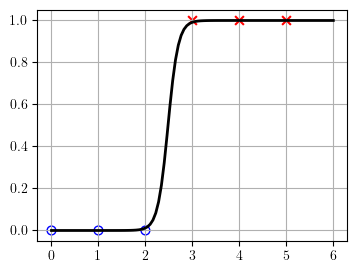

In [60]:
## Let us plot the result
plt.figure(figsize=(4, 3))
plt.scatter(x_train[y_train==1], y_train[y_train==1], marker='x', color='r', s=40)
plt.scatter(x_train[y_train==0], y_train[y_train==0], marker='o', facecolors='none', edgecolors='b', s=40)

xx = np.linspace(0, 6, 101)
plt.plot(xx, sigmoid(xx * w_final[0] + b_final), 'k-', lw=2)
plt.grid(True)

In [ ]:
X_new = x_new.reshape((-1, 1))
w_final, b_final, history = gradient_descent(X_new, y_new, 
                                             w_init=np.array([0.1]), b_init=0.1, alpha=0.1, 
                                             func_value=compute_cost_max_likelihood, func_grad=compute_cost_grad, 
                                             TOL=1e-6, max_iter=np.uint32(1e5))
print(f"w_final = {w_final}")
print(f"b_final = {b_final}")
print(f"-b_final/f_final", -b_final / w_final)

plt.plot(history['J'])

IndexError: list index out of range

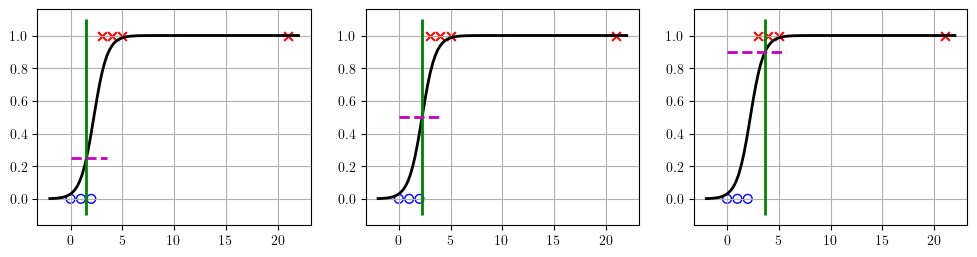

In [17]:
## Let us plot the result
threshold_list = [0.25, 0.5, 0.9]
fig, ax = plt.subplots(1, 3, figsize=(12, 2.8))
for i in range(len(threshold_list)):
    threshold = threshold_list[i]
    ax[i].scatter(x_new[y_new==1], y_new[y_new==1], marker='x', color='r', s=40)
    ax[i].scatter(x_new[y_new==0], y_new[y_new==0], marker='o', facecolors='none', edgecolors='b', s=40)
    xx = np.linspace(-2, 22, 101)
    ax[i].plot(xx, sigmoid(xx * w_final[0] + b_final), 'k-', lw=2)
    kappa = 1/threshold - 1
    x0 = -(np.log(kappa) + b_final)/w_final[0]
    ax[i].vlines(x0, -0.1, 1.1, colors='g', lw=2)
    ax[i].hlines(threshold, 0, x0+2, colors='m', lw=2, ls='--')
    ax[i].grid(True)

As we can see from the above plot, by using different threshold, we may end up with different boundary decision lines (curves) and thus also also make different decisions. For example, when the threshold $\tau = 0.25$ we misclassified one circle blue, and when $\tau = 0.9$ we misclassified one red cross, and the classifcation is good when $\tau = 0.5$.

**NOTE**

This is just an example. The choice of threshold depends on the application and the experience of the expertise in the field. This example does not demonstrate by any means $\tau = 0.5$ is the best threshold. It does not claim or conclude anything about the best threshold. The example is to show we obtain different decision boundaries by varying the threshold.